In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('electricity_consumption.csv.csv',index_col='Bill_Date',parse_dates=True)
df.index.freq='MS'

In [4]:
df.head

<bound method NDFrame.head of             Billed_amount
Bill_Date                
2016-01-01         247.73
2016-02-01         234.11
2016-03-01         123.85
2016-04-01         111.22
2016-05-01         118.37
2016-06-01          77.81
2016-07-01          86.67
2016-08-01         122.40
2016-09-01         223.62
2016-10-01         152.54
2016-11-01         150.54
2016-12-01         244.37
2017-01-01         263.64
2017-02-01         214.32
2017-03-01         151.54
2017-04-01         118.79
2017-05-01         153.18
2017-06-01         212.08
2017-07-01         281.19
2017-08-01         237.97
2017-09-01         284.30
2017-10-01         172.69
2017-11-01         111.51
2017-12-01         151.42
2018-01-01         267.32
2018-02-01         201.35
2018-03-01         202.91
2018-04-01         150.86
2018-05-01         163.07
2018-06-01         219.76
2018-07-01         283.98
2018-08-01         290.15
2018-09-01         257.96
2018-10-01         327.19
2018-11-01         193.49
2018-12-

<Axes: xlabel='Bill_Date'>

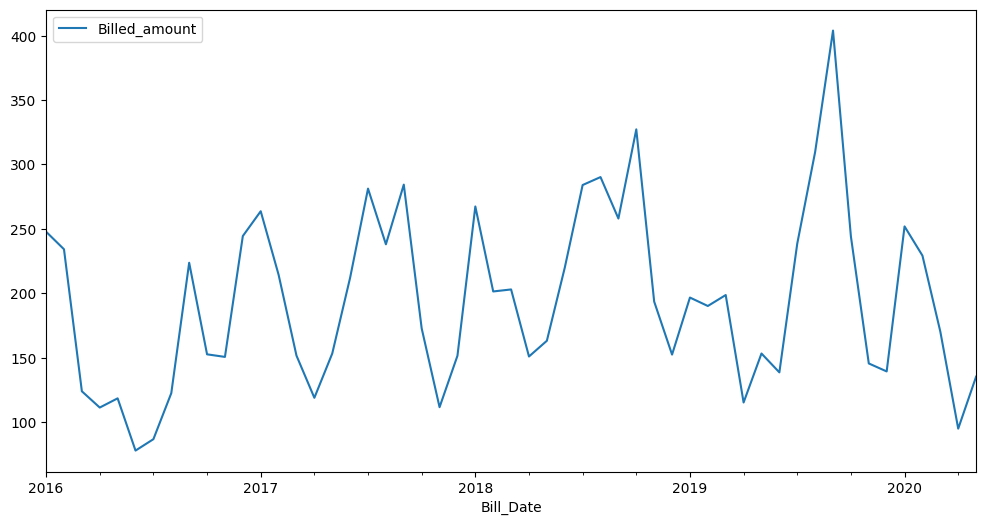

In [5]:
df.plot(figsize=(12,6))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

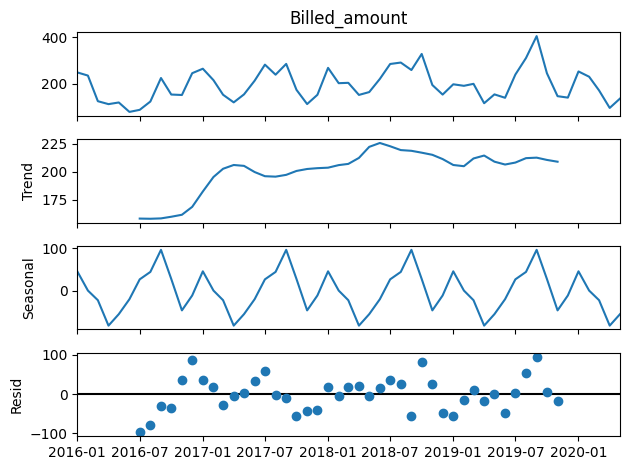

In [8]:
results = seasonal_decompose(df['Billed_amount'])
results.plot();

In [9]:

len(df)

53

In [10]:
train = df.iloc[:41]
test = df.iloc[41:]


In [11]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
df.head(),df.tail()

(            Billed_amount
 Bill_Date                
 2016-01-01         247.73
 2016-02-01         234.11
 2016-03-01         123.85
 2016-04-01         111.22
 2016-05-01         118.37,
             Billed_amount
 Bill_Date                
 2020-01-01         251.85
 2020-02-01         229.18
 2020-03-01         170.16
 2020-04-01          94.85
 2020-05-01         135.19)

In [13]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [14]:
scaled_train[:10]

array([[0.6813698 ],
       [0.62675435],
       [0.18461785],
       [0.13397225],
       [0.16264336],
       [0.        ],
       [0.03552811],
       [0.17880343],
       [0.58469003],
       [0.29966316]])

In [15]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


C:\Users\Asmit\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [16]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [17]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.6813698  0.62675435 0.18461785]
Predict this y: 
 [[0.13397225]]


In [18]:

X.shape

(1, 3, 1)

In [19]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Input

In [21]:
model = Sequential()
model.add(Input(shape=(n_input, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')


In [22]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
print(len(generator))


29


In [24]:
import keras
keras.config.disable_traceback_filtering()


In [25]:
model.fit(
    generator,
    epochs=50,
    steps_per_epoch=len(generator)
)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.1493
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0704
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0643
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0587
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0599
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0668
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0603
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0604
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0583
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0613
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0555
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0536
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0546
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0556
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0604
Epoch 16/50
29/29 ━

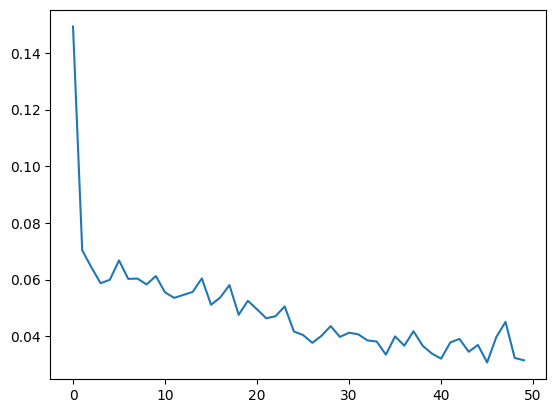

In [26]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [27]:

last_train_batch = scaled_train[-12:]

In [28]:

last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [29]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step


array([[0.5549723]], dtype=float32)

In [30]:

scaled_test[0]

array([0.24348384])

In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):


    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [32]:

test_predictions

[array([0.5549723], dtype=float32),
 array([0.7912975], dtype=float32),
 array([0.85279787], dtype=float32),
 array([0.7544917], dtype=float32),
 array([0.7522219], dtype=float32),
 array([0.52384216], dtype=float32),
 array([0.3987889], dtype=float32),
 array([0.42505413], dtype=float32),
 array([0.4512323], dtype=float32),
 array([0.48562425], dtype=float32),
 array([0.43784672], dtype=float32),
 array([0.44567835], dtype=float32)]

In [33]:
test.head()

,Billed_amount
Bill_Date,
2019-06-01,138.53
2019-07-01,238.48
2019-08-01,309.65
2019-09-01,403.89
2019-10-01,244.03


In [34]:

true_predictions = scaler.inverse_transform(test_predictions)

In [35]:

test['Predictions'] = true_predictions

C:\Users\Asmit\AppData\Local\Temp\ipykernel_14840\4117640987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Bill_Date'>

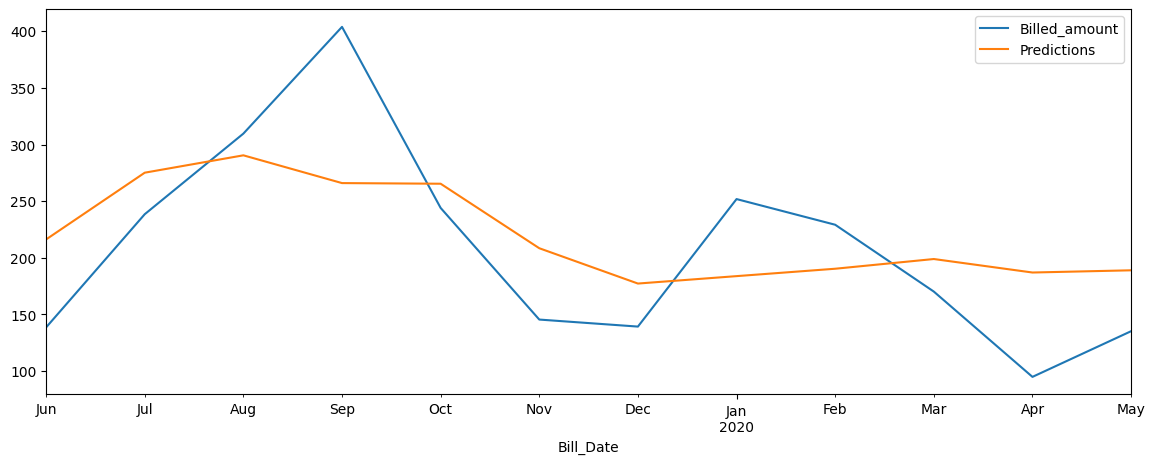

In [36]:

test.plot(figsize=(14,5))

In [38]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['Billed_amount'],test['Predictions']))
print(rmse)

65.1817625165618
